In [1]:
import itertools
import matplotlib.pyplot as plt
import pandas as pd

from python.sampling_trajectory import stepsize
from python.sampling_trajectory import simple_stairs
from python.sampling_trajectory import campolongo_2007

In [2]:
def bar_plot(input_par_array):
    new_list = input_par_array.reshape(-1, 1).tolist()
    merged = pd.Series(itertools.chain.from_iterable(new_list))
    vc = merged.value_counts().sort_index()
    vc /= float(vc.sum())
    assert vc.sum() > 0.999
    ax = vc.plot(kind='bar')
    fig = ax.get_figure()
    fig.autofmt_xdate()

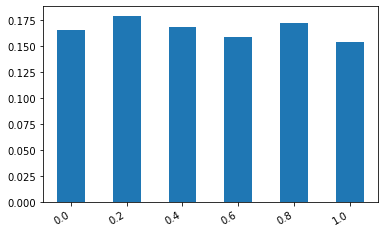

In [8]:
"""Experiment stepsize"""
input_par_array, trajs_list = simple_stairs(
    n_inputs=5, n_levels=6, n_traj=200, step_function=stepsize
)
bar_plot(input_par_array)

In [ ]:
"""Experiment Campolongo"""
input_par_array, trajs_list = campolongo_2007(
    n_inputs=5, n_levels=6, n_traj_sample=40, n_traj=30
)

bar_plot(input_par_array)